In [9]:
import pandas as pd
from dirty_cat import SuperVectorizer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
import numpy as np
import sklearn

In [91]:
df = pd.read_csv("data/2020ssc_publica.csv")


/Users/leo/opt/anaconda3/envs/nootropics/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (96) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [92]:
print(list(df.columns))

['PreviousSurveys', 'Public', 'Age', 'Country', 'Race', 'Sex', 'Gender', 'SexualOrientation', 'Relationshipstyle', 'RelationshipStatus', 'Children', 'WorkStatus', 'Profession', 'Degree', 'EducationComplete', 'ReligiousViews', 'ReligiousDenomination', 'ReligiousBackground', 'MoralViews', 'IQ', 'SATscoreverbalreading', 'SATscoremath', 'SATfirsttime', 'SATpreparationtype', 'SATpreparationamount', 'LengthofTime', 'Comment', 'Referrals', 'Subreddit', 'Discord', 'Ads', 'Meetup', 'MeetupApproval', 'LWID', 'EAID', 'LifeEffects', 'LifeEffects2', 'PoliticalSpectrum', 'PoliticalInterest', 'PoliticalAffiliation', 'AmericanParties', 'PoliticalChange', 'GlobalWarming', 'Immigration', 'MinimumWage', 'Feminism', 'HumanBiodiversity', 'BasicIncome', 'DonaldTrump', 'DemocraticNominee', 'Income', 'IncomeStatus', 'ClassChildhood', 'ClassCurrent', 'Charity', 'Depression', 'Anxiety', 'OCD', 'Eatingdisorder', 'PTSD', 'Alcoholism', 'Drugaddiction', 'Borderline', 'Bipolar', 'Autism', 'ADHD', 'Schizophrenia', 'S

In [93]:
cols_to_keep = ['Age', 'Country', 'Race', 'Sex',  'RelationshipStatus', 'WorkStatus', 'IQ', 'SATscoreverbalreading', 'SATscoremath',  'Income', 'IncomeStatus', 'Depression', 'Anxiety', 'OCD', 'Eatingdisorder', 'PTSD', 'Alcoholism', 'Drugaddiction', 'Borderline', 'Bipolar', 'Autism', 'ADHD', 'Schizophrenia', 'Suicide', 'MoodScale', 'Anxiety_A', 'Childhood', 'LifeSatisfaction', 'JobSatisfaction', 'SocialSatisfaction', 'RomanticSatisfaction', 'Risks', 'Vegetarian', 'STEM', 'Dreams', 'Allergies',  'Parties', 'CoffeeSleepy', 'AdderallSleepy', 'AdderallHungry', 'AdderallHorny', 'SSRIeffectiveness', 'SexualPartners', 'MasturbationNumber', 'Acne', 'Bedtime3', 'Waketime3', 'SleepLatency', 'NighttimeAwakenings', 'SleepQuality', 'MelatoninResponse', 'Medication', 'Tiredness1', 'Tiredness2', 'Tiredness3', 'Seasonal2',  'PsychedelicDoses','OtherEffectiveness', 'KetogenicDiet', 'Experimentingwithnootropics', 'Circling', 'NoFaporotherwiseavoidingmasturbation', 'Carnivorediet', 'Circadianrhythmhackingblueblockingglassesatnightbrightlightsinmo']
cols_name = ['Age', 'Country', 'Race', 'Sex',  'RelationshipStatus', 'WorkStatus', 'IQ', 'SATverbal', 'SATmath',  'Income', 'IncomeStatus', 'Depression', 'Anxiety', 'OCD', 'Eatingdisorder', 'PTSD', 'Alcoholism', 'Drugaddiction', 'Borderline', 'Bipolar', 'Autism', 'ADHD', 'Schizophrenia', 'Suicide', 'MoodScale', 'Anxiety_A', 'Childhood', 'LifeSatisfaction', 'JobSatisfaction', 'SocialSatisfaction', 'RomanticSatisfaction', 'Risks', 'Vegetarian', 'STEM', 'Dreams', 'Allergies',  'Parties', 'CoffeeSleepy', 'AdderallSleepy', 'AdderallHungry', 'AdderallHorny', 'SSRIeffectiveness', 'SexualPartners', 'MasturbationNumber', 'Acne', 'Bedtime3', 'Waketime3', 'SleepLatency', 'NighttimeAwakenings', 'SleepQuality', 'MelatoninResponse', 'Medication', 'Tiredness1', 'Tiredness2', 'Tiredness3', 'SeasonalInfluence',  'PsychedelicDoses','SelfHelpEffectiveness', 'KetogenicDiet', 'Nootropics', 'Circling', 'NoFap', 'CarnivoreDiet', 'CircadianHacking']
df = df[cols_to_keep]
df.columns = cols_name

In [94]:
df = df[np.isin(df["Age"], list(map(str, range(10, 100, 10))))]
df["Age"] = df["Age"].astype(np.int32)

In [95]:
df

,Age,Country,Race,Sex,RelationshipStatus,WorkStatus,IQ,SATverbal,SATmath,Income,...,Tiredness3,SeasonalInfluence,PsychedelicDoses,SelfHelpEffectiveness,KetogenicDiet,Nootropics,Circling,NoFap,CarnivoreDiet,CircadianHacking
0,20,,Hispanic,Male,Relationship,,,,,105000,...,3,I feel slightly worse in the winter,6 - 20 times,,,3,,3,,
1,50,United States,Hispanic,Male,Married,Academics (on the teaching side),,,,130000,...,2,No real change,Never,,,,,,,
2,30,United States,Asian (East Asian),Male,Relationship,For-profit work,,650,720,,...,1,I feel slightly worse in the winter,Once,,,2,,,,
3,50,United States,White (non-Hispanic),Male,Married,For-profit work,148,750,630,,...,2,No real change,6 - 20 times,,,,,,,
4,20,United States,White (non-Hispanic),Male,Relationship,Unemployed,,,800,0,...,2,I feel slightly worse in the winter,Never,,,,,,,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,20,Austria,White (non-Hispanic),Male,Single,Student,,,,,...,4,"I feel much worse in winter, although I have n...",,,,,,,,
7333,20,Australia,White (non-Hispanic),Male,Single,Student,,,,8000,...,4,I feel slightly better in the winter,2 - 5 times,,,1,,,,
7334,30,Australia,White (non-Hispanic),Male,Married,For-profit work,,,,140000,...,1,I feel slightly worse in the winter,2 - 5 times,,,,,,,
7335,30,,White (non-Hispanic),Male,Single,For-profit work,,,,,...,3,No real change,Never,,,,,,,


In [101]:
df = df.replace(r'^\s+$', np.nan, regex=True)
X = df.drop('Nootropics', axis=1)
y = df["Nootropics"]
mask = y.isna()

y = y[~mask]
X = X[~mask]


#print(len(SuperVectorizer(auto_cast=True, impute_missing="force").fit_transform(X, y)))

#X = SuperVectorizer(auto_cast=True, impute_missing="force").fit_transform(X, y)


In [102]:
pipeline = make_pipeline(
    SuperVectorizer(auto_cast=True, impute_missing="force"),
    HistGradientBoostingRegressor()
)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error')
print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')


scores=[-1.2374941  -1.19931272 -1.20905315 -1.2140487  -1.2796535 ]
mean=-1.227912432665651
std=0.02875679000495913


In [103]:
sup_vec = SuperVectorizer(auto_cast=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

X_train_enc = sup_vec.fit_transform(X_train, y_train)
X_test_enc = sup_vec.transform(X_test)

In [104]:
from sklearn.ensemble import RandomForestRegressor
regressor = HistGradientBoostingRegressor()
regressor.fit(X_train_enc, y_train)

HistGradientBoostingRegressor()

In [86]:
importances = regressor.feature_importances_
std = np.std(
    [
        tree.feature_importances_
        for tree in regressor.estimators_
    ],
    axis=0
)
indices = np.argsort(importances)
# Sort from least to most
indices = list(reversed(indices))
feature_names = sup_vec.get_feature_names()

AttributeError: 'HistGradientBoostingRegressor' object has no attribute 'feature_importances_'

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Feature importances")
n = 40
n_indices = indices[:n]
labels = np.array(feature_names)[n_indices]
plt.barh(range(n), importances[n_indices], color="b", yerr=std[n_indices])
plt.yticks(range(n), labels, size=15)
plt.tight_layout(pad=1)
plt.show()

In [105]:
from sklearn.inspection import permutation_importance
result = permutation_importance(regressor, X_test_enc, y_test, n_repeats=10, scoring="neg_root_mean_squared_error")


In [106]:
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)
# Sort from least to most
indices = list(reversed(indices))
feature_names = sup_vec.get_feature_names()

/Users/leo/opt/anaconda3/envs/nootropics/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


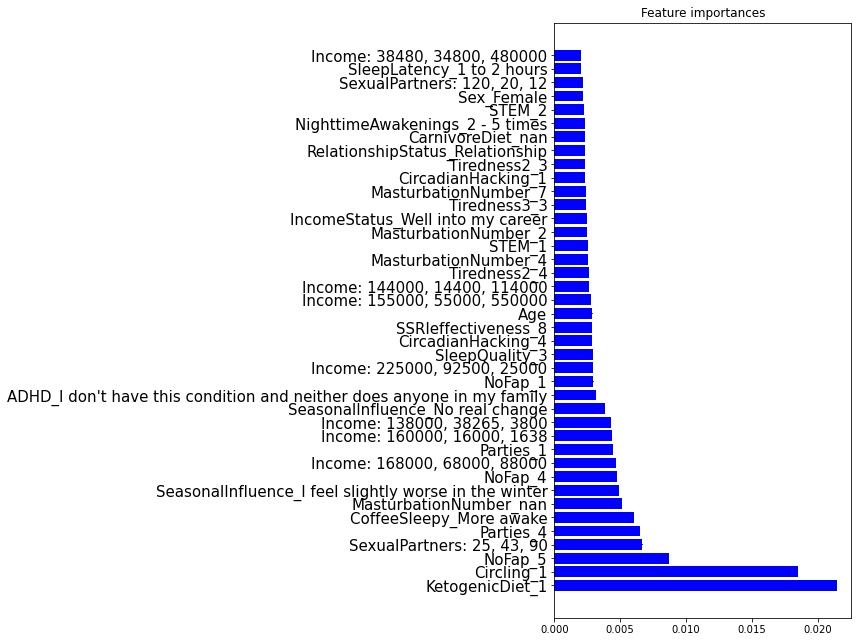

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Feature importances")
n = 40
n_indices = indices[:n]
labels = np.array(feature_names)[n_indices]
plt.barh(range(n), importances[n_indices], color="b", yerr=std[n_indices])
plt.yticks(range(n), labels, size=15)
plt.tight_layout(pad=1)
plt.show()